<a href="https://colab.research.google.com/github/crowell97/ES2245/blob/main/es2245_lecture8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EARTHSC 2245: Lecture 8 - Sample Means, Z-tests and T-tests

This notebook demonstrates the statistical concepts covered in Lecture 8, including the distinction between population and sample means, the Central Limit Theorem, and hypothesis testing using Z-tests and T-tests.

## **1. Setup and Libraries**
First, we import the necessary libraries for data generation, statistical calculations, and plotting.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

# Set seed for reproducibility
np.random.seed(42)
sns.set_theme(style="whitegrid")

## **2. Population Mean vs. Sample Mean**
**Theory:**
* **Population Mean ($\mu$):** The true average of the entire group. It is usually unknown and treated as a theoretical constant.
* **Sample Mean ($\bar{x}$):** The average of a smaller subset drawn from the population. It is an estimator used to infer $\mu$.

**Key Property:** The sample mean is an "unbiased estimator," meaning if you take many samples, their average will equal the population mean.

In [2]:
# Create a "Population" of 1,000,000 data scientists with an avg salary of $120k
population_size = 1000000
population_mean_true = 120000
population_std_true = 30000
population = np.random.normal(population_mean_true, population_std_true, population_size)

# Calculate true Population Mean (mu)
mu = np.mean(population)
print(f"True Population Mean (μ): ${mu:,.2f}")

# Take a sample of 500 individuals
sample_size = 500
sample = np.random.choice(population, sample_size)

# Calculate Sample Mean (x_bar)
x_bar = np.mean(sample)
print(f"Sample Mean (x̄) (n=500): ${x_bar:,.2f}")

# Demonstrate 'Unbiased Estimator' by taking 1000 different samples
sample_means = [np.mean(np.random.choice(population, sample_size)) for _ in range(1000)]
average_of_sample_means = np.mean(sample_means)

print(f"Average of 1000 Sample Means: ${average_of_sample_means:,.2f} (Approximates μ)")

True Population Mean (μ): $119,952.01
Sample Mean (x̄) (n=500): $118,226.82
Average of 1000 Sample Means: $119,957.02 (Approximates μ)


## **3. Law of Large Numbers**
**Theory:**
The **Law of Large Numbers** states that as the sample size ($n$) increases, the sample mean ($\bar{x}$) gets closer and closer to the population mean ($\mu$).
* **Small $n$:** The sample mean might be far off the mark (high variability).
* **Large $n$:** The sample mean is a highly precise estimate.

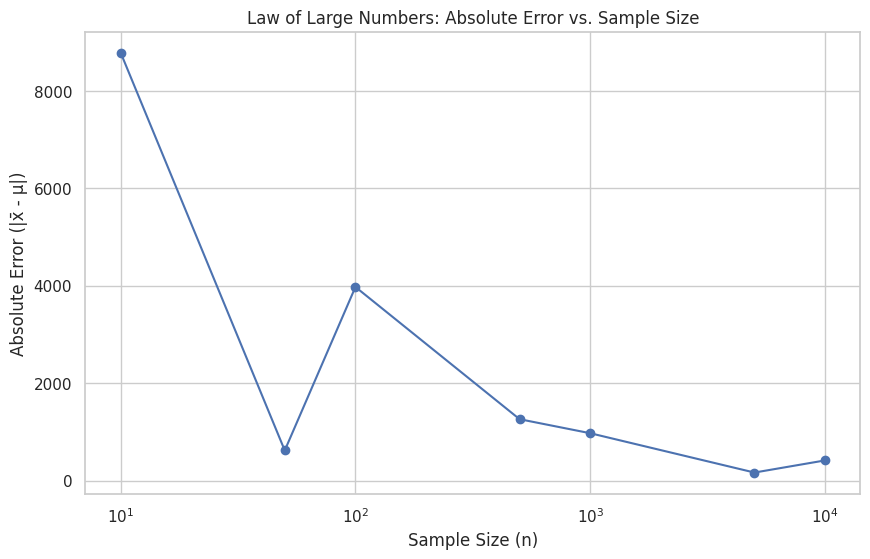

In [3]:
sample_sizes = [10, 50, 100, 500, 1000, 5000, 10000]
errors = []

for n in sample_sizes:
    s = np.random.choice(population, n)
    error = abs(np.mean(s) - mu)
    errors.append(error)

plt.figure(figsize=(10, 6))
plt.plot(sample_sizes, errors, marker='o', linestyle='-')
plt.title('Law of Large Numbers: Absolute Error vs. Sample Size')
plt.xlabel('Sample Size (n)')
plt.ylabel('Absolute Error (|x̄ - μ|)')
plt.xscale('log')  # Log scale to see the drop clearly
plt.show()

## **4. Variance and Bessel's Correction**
**Theory:**
* **Population Variance ($\sigma^2$):** Calculated by dividing by $N$ (total items in the population). [cite_start]Used when you have *all* data.
* **Sample Variance ($s^2$):** Calculated by dividing by $n-1$.
    * **Bessel's Correction:** Calculating variance using the sample mean ($\bar{x}$) instead of the true mean ($\mu$) creates a bias that underestimates the variance. Dividing by $n-1$ corrects this bias, making $s^2$ an unbiased estimator.

In [4]:
# Calculate variances for a small sample
small_sample = np.random.choice(population, 10)

# Biased Variance (dividing by n)
var_biased = np.var(small_sample, ddof=0)

# Unbiased Sample Variance (dividing by n-1)
var_unbiased = np.var(small_sample, ddof=1)

print(f"Biased Variance (div n): {var_biased:,.2f}")
print(f"Unbiased Variance (div n-1): {var_unbiased:,.2f}")
print("The unbiased variance is slightly larger to account for uncertainty.")

Biased Variance (div n): 2,215,271,342.43
Unbiased Variance (div n-1): 2,461,412,602.70
The unbiased variance is slightly larger to account for uncertainty.


## **5. The Central Limit Theorem & Standard Error**
**Theory:**
* **Standard Error (SEM):** Quantifies how much the sample mean ($\bar{x}$) is likely to fluctuate from the true population mean ($\mu$) if the experiment were repeated.
    * Formula: $SEM = \frac{\sigma}{\sqrt{n}}$.
* **Central Limit Theorem:** If you take repeated samples, the distribution of their means will form a Normal Distribution (Bell Curve) centered on $\mu$, with a width equal to the SEM.

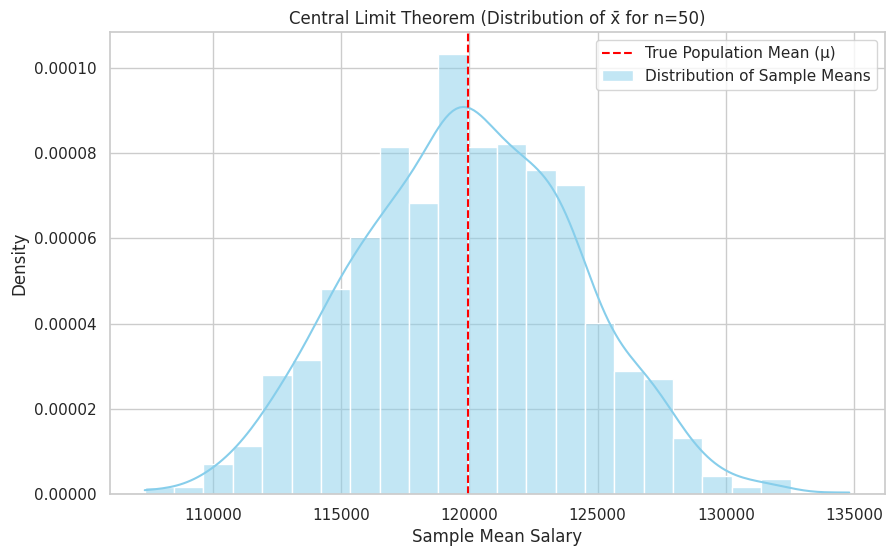

Theoretical SEM: 4242.64
Standard Deviation of Sample Means (Simulated SEM): 4250.82


In [5]:
# Simulate Central Limit Theorem
n_samples = 1000
sample_size_clt = 50
means_clt = [np.mean(np.random.choice(population, sample_size_clt)) for _ in range(n_samples)]

# Calculate Theoretical SEM
sem_theoretical = population_std_true / np.sqrt(sample_size_clt)

plt.figure(figsize=(10, 6))
sns.histplot(means_clt, kde=True, stat="density", color="skyblue", label="Distribution of Sample Means")
plt.axvline(mu, color='red', linestyle='--', label="True Population Mean (μ)")
plt.title(f'Central Limit Theorem (Distribution of x̄ for n={sample_size_clt})')
plt.xlabel('Sample Mean Salary')
plt.legend()
plt.show()

print(f"Theoretical SEM: {sem_theoretical:.2f}")
print(f"Standard Deviation of Sample Means (Simulated SEM): {np.std(means_clt):.2f}")

## **6. The Z-Score and Z-Test**
**Theory:**
* **Z-Score:** A way to standardize data, telling you how many standard deviations a point is from the mean. It allows for comparing values from different datasets (e.g., comparing "apples to oranges").
* **Outlier Detection:** If $|Z| > 3$, the point is typically considered an outlier.
* **Z-Test:** Used to test if a sample mean is significantly different from a population mean. It requires knowing the true population standard deviation ($\sigma$).

In [6]:
# 1. Standardization Example
test_a_score = 80; mean_a = 70; sd_a = 10
test_b_score = 40; mean_b = 30; sd_b = 5

z_a = (test_a_score - mean_a) / sd_a
z_b = (test_b_score - mean_b) / sd_b

print(f"Test A Z-score: {z_a}")
print(f"Test B Z-score: {z_b} (Better performance relative to group)")

# 2. Z-Test Implementation
# Hypothesis: Sample comes from population with mean = 120,000
# Sample: n=50, mean=110,000 (Is this significantly different?)
sample_mean_test = 110000
hypothesized_mean = 120000
known_sigma = 30000
n_test = 50

z_statistic = (sample_mean_test - hypothesized_mean) / (known_sigma / np.sqrt(n_test))
p_value_z = 2 * (1 - stats.norm.cdf(abs(z_statistic))) # Two-tailed

print(f"\nZ-Test Statistic: {z_statistic:.2f}")
print(f"P-Value: {p_value_z:.4f}")
if p_value_z < 0.05:
    print("Reject Null Hypothesis (Significant difference)")
else:
    print("Fail to Reject Null Hypothesis")

Test A Z-score: 1.0
Test B Z-score: 2.0 (Better performance relative to group)

Z-Test Statistic: -2.36
P-Value: 0.0184
Reject Null Hypothesis (Significant difference)


## **7. The T-Test (Student's t-test)**
**Theory:**
* **Problem:** In real research, we rarely know the population standard deviation ($\sigma$).
* **Solution:** We use the sample standard deviation ($s$) as an estimate. This introduces extra uncertainty.
* **T-Distribution:** To account for this uncertainty, the t-test uses the Student's t-distribution, which is shorter and wider ("fatter tails") than the Normal distribution.
* **Decision:** We compare the calculated t-value to a critical t-value (based on degrees of freedom $df=n-1$) to decide whether to reject the Null Hypothesis.

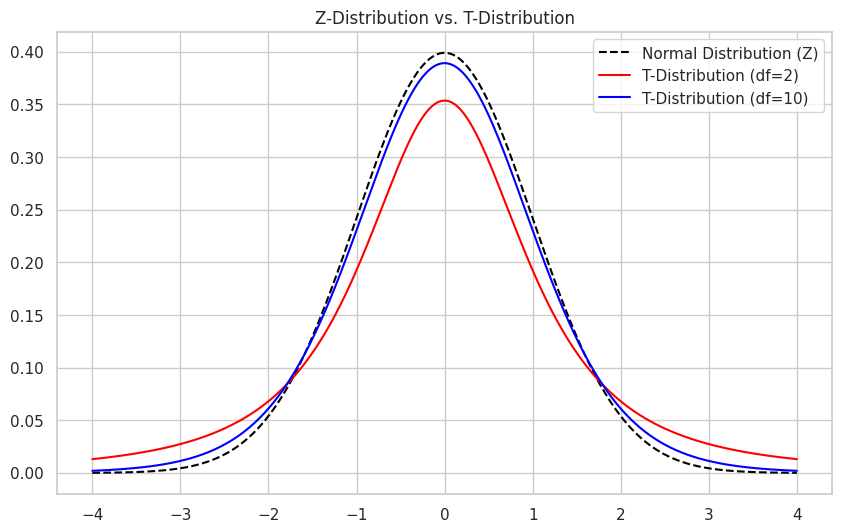

Sample Mean: 120440.28
T-Statistic: 0.05
P-Value: 0.9574
Conclusion: Fail to Reject Null Hypothesis


In [7]:
# Compare Normal Distribution vs T-Distribution (small degrees of freedom)
x_axis = np.linspace(-4, 4, 1000)
plt.figure(figsize=(10, 6))
plt.plot(x_axis, stats.norm.pdf(x_axis), label='Normal Distribution (Z)', color='black', linestyle='--')
plt.plot(x_axis, stats.t.pdf(x_axis, df=2), label='T-Distribution (df=2)', color='red')
plt.plot(x_axis, stats.t.pdf(x_axis, df=10), label='T-Distribution (df=10)', color='blue')
plt.title('Z-Distribution vs. T-Distribution')
plt.legend()
plt.show()

# One-Sample T-Test Example
# We don't know population sigma. We only have sample data.
sample_data = np.random.normal(125000, 35000, 20) # n=20
t_stat, p_val_t = stats.ttest_1samp(sample_data, popmean=120000)

print(f"Sample Mean: {np.mean(sample_data):.2f}")
print(f"T-Statistic: {t_stat:.2f}")
print(f"P-Value: {p_val_t:.4f}")

if p_val_t < 0.05:
    print("Conclusion: Reject Null Hypothesis (Difference is significant)")
else:
    print("Conclusion: Fail to Reject Null Hypothesis")